mtry_min.node.size.csv
mtry_replace.csv
mtry_sample.fraction.csv
num.trees_min.node.size.csv
num.trees_mtry.csv
num.trees_replace.csv
num.trees_sample.fraction.csv
sample.fraction_min.node.size.csv
sample.fraction_replace.csv


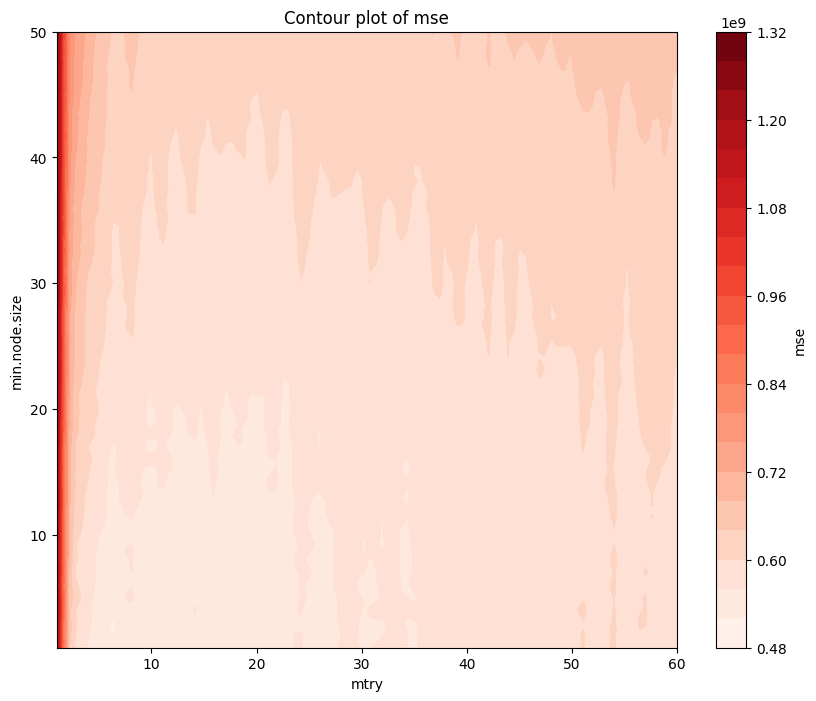

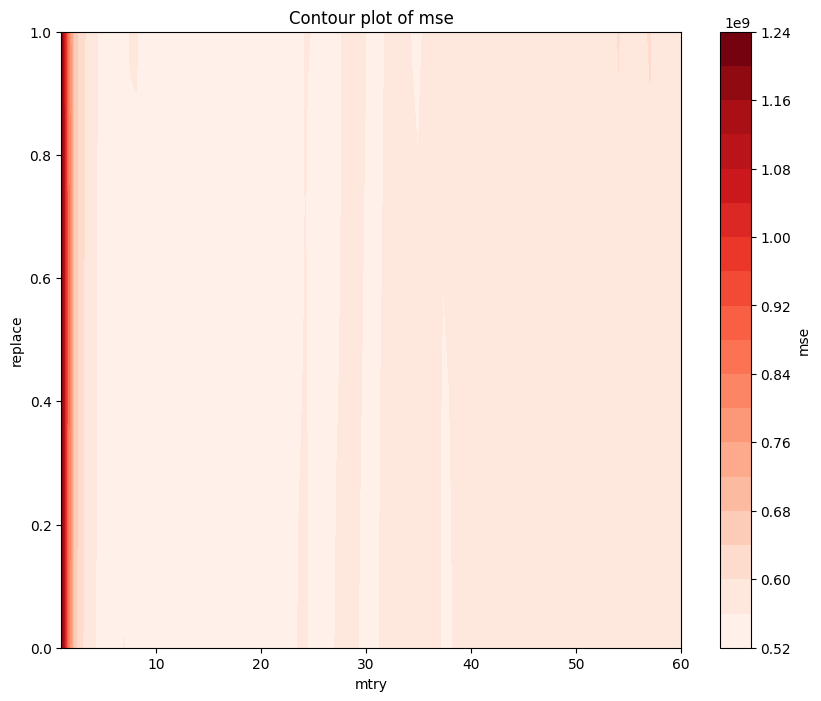

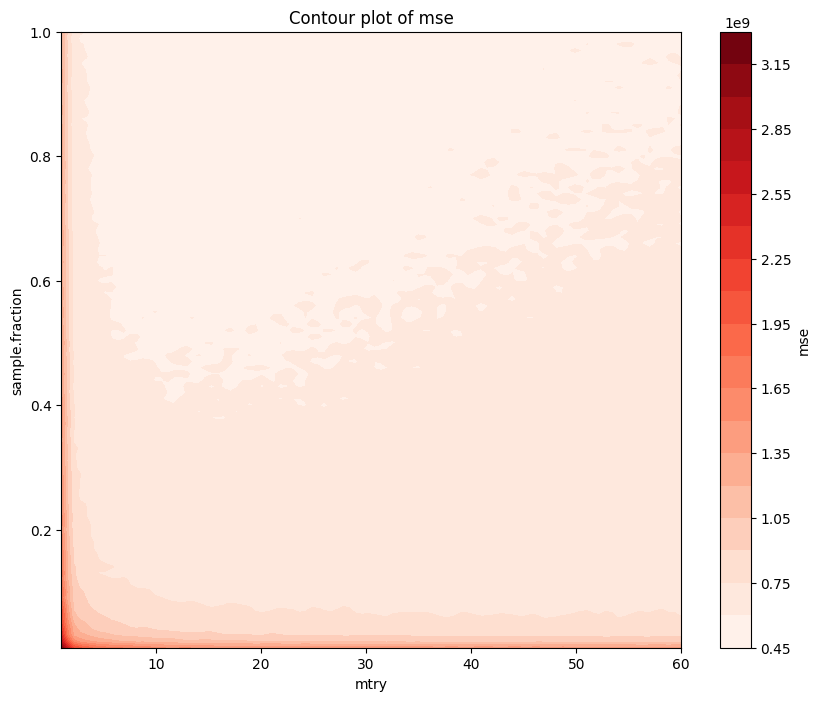

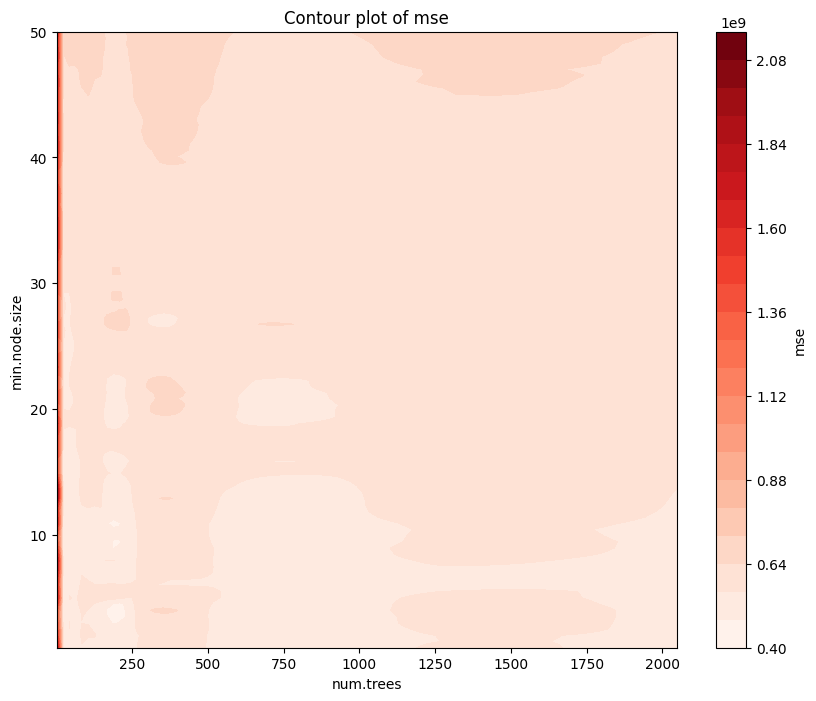

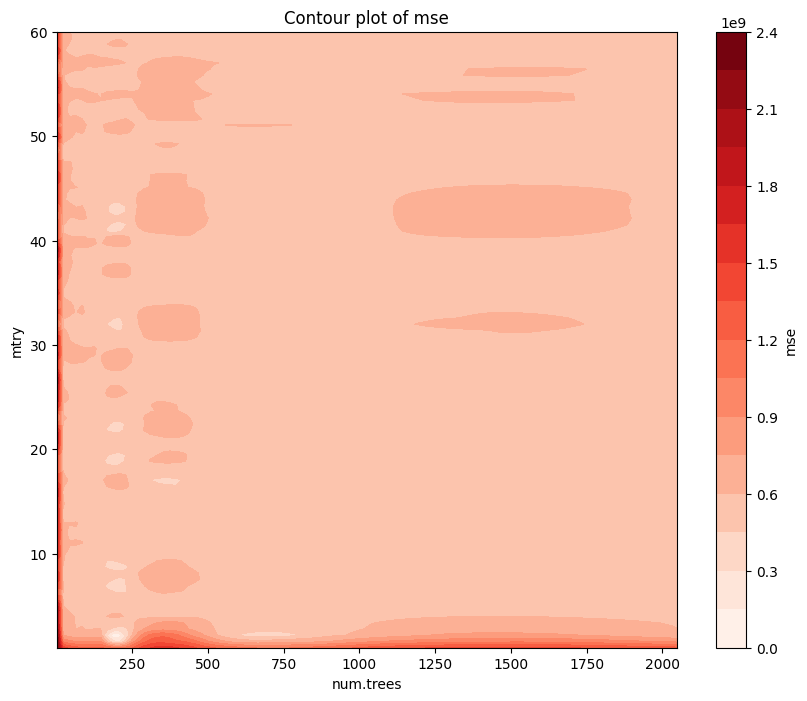

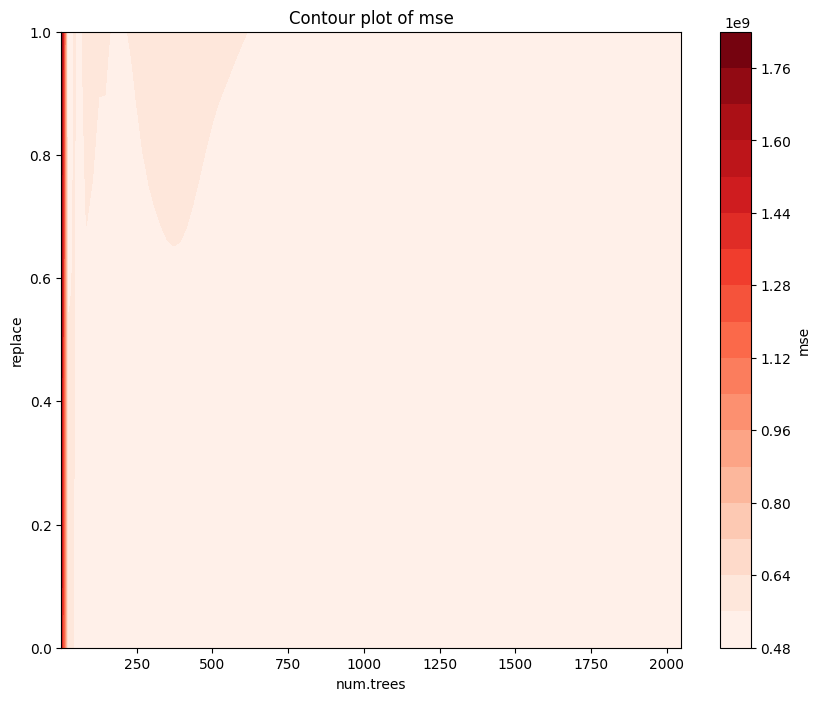

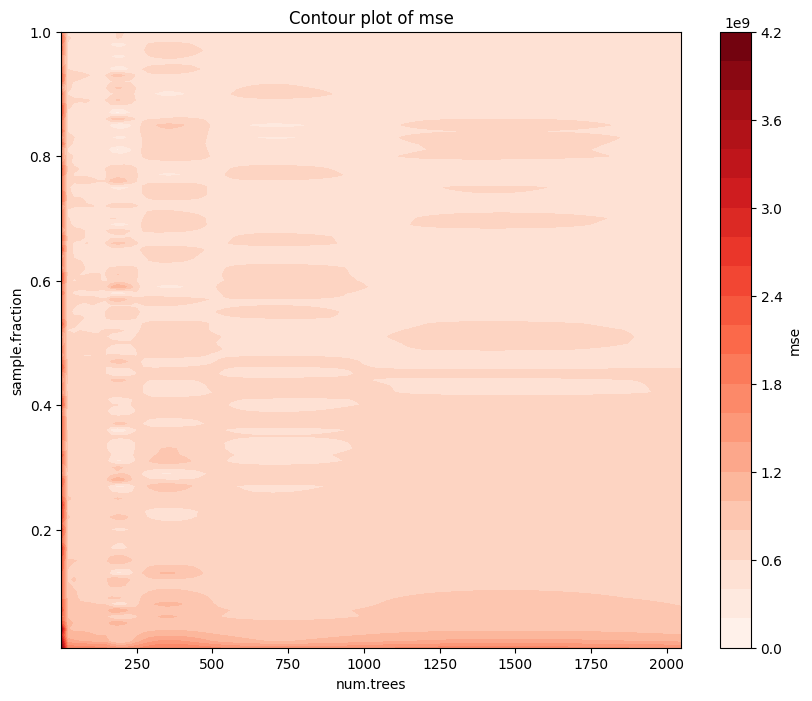

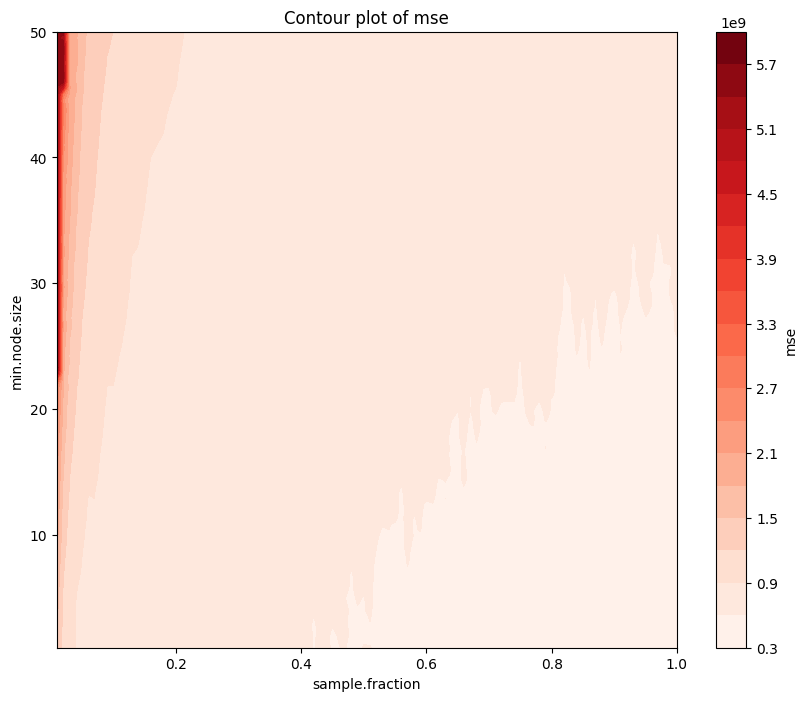

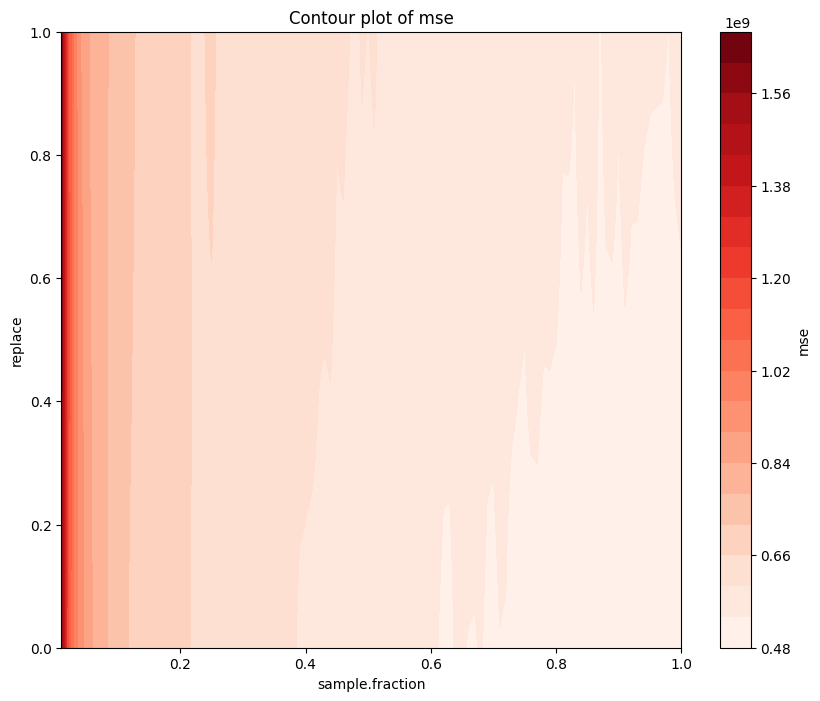

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os

dir_files = os.listdir('./resources/results_pairwise/')
for file in dir_files:
    if file.endswith('.csv'):
        print(file)
        df = pd.read_csv('./resources/results_pairwise/' + file)
        param1 = df.columns[0]
        param2 = df.columns[1]
        param3 = df.columns[2]

        # Create grid values first.
        x = df[param1]
        y = df[param2]
        z = df[param3]

        # Create a grid to interpolate your data.
        grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

        # Interpolate the data.
        grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

        # Create the contour plot
        plt.figure(figsize=(10, 8))
        plt.contourf(grid_x, grid_y, grid_z, 20, cmap='Reds')
        plt.colorbar(label='mse')

        # Set the labels
        plt.xlabel(param1)
        plt.ylabel(param2)
        plt.title('Contour plot of mse')

        # plt.show()
        plt.savefig('./resources/results_pairwise/images/' + file[:-4] + '.png')
